In [2]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots.
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("Data_Set/Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
# Converting the rate column to a float by removing denominator.
def convert_rate_to_float(rate):
    """
    # Function to convert rate from string to float by removing the 
    # denominator if present.
    """
    rate = str(rate).split('/')
    rate = rate[0].strip()
    try:
        return float(rate)
    except ValueError:
        return np.nan
    
df['rate'] = df['rate'].apply(convert_rate_to_float)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
# Getting summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


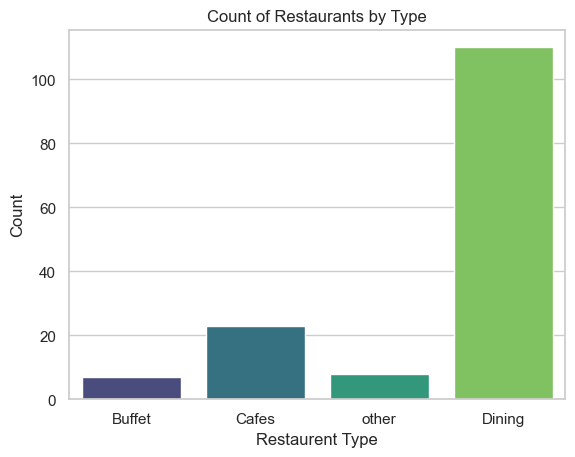

In [13]:
# Exploring Restaurant Types.
sns.countplot(data=df, x='listed_in(type)', hue='listed_in(type)', palette='viridis')
plt.xlabel('Restaurent Type')
plt.ylabel('Count')
plt.title('Count of Restaurants by Type')
plt.show()

Conclusion: The majority of the restaurants fall into the dining category.

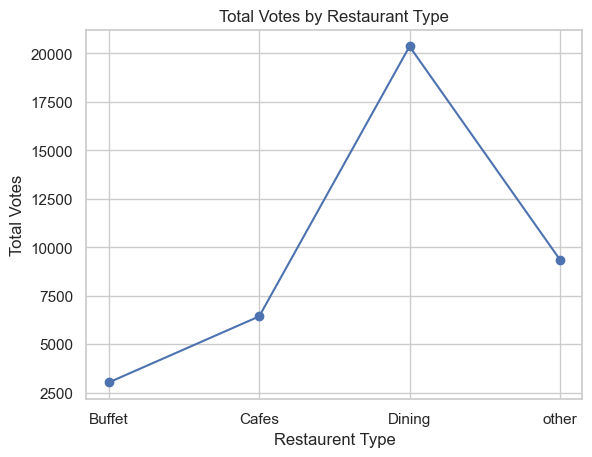

In [22]:
# Plotting vote by restaurant type.
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
plt.plot(grouped_data, marker='o', linestyle='-', color='b')
plt.title('Total Votes by Restaurant Type')
plt.xlabel('Restaurent Type')
plt.ylabel('Total Votes')
plt.show()

Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [24]:
#  Identifying the most voted restaurant.
most_voted_restaurant = df.loc[df['votes'].idxmax()]
print("Most Voted Restaurant:")
print(f"Name: {most_voted_restaurant['name']}")
print(f"Votes: {most_voted_restaurant['votes']}")


Most Voted Restaurant:
Name: Empire Restaurant
Votes: 4884


In [27]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


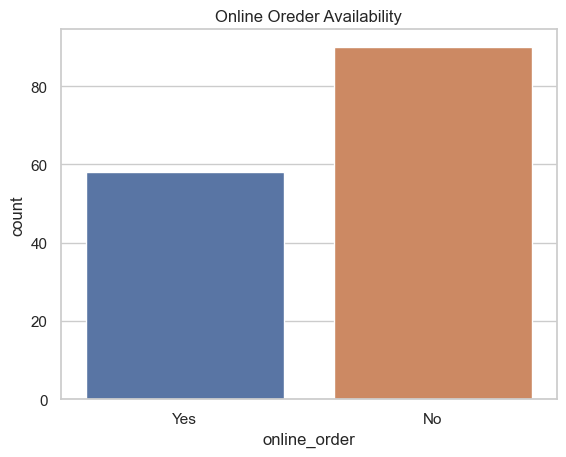

In [ ]:
# Exploring Online Order Availability.
sns.countplot(data=df, x='online_order', hue='online_order')
plt.title('Online Oreder Availability')
plt.show()

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

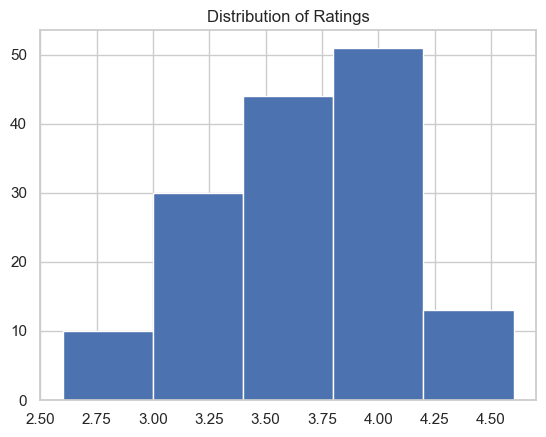

In [34]:
# Analysing Ratings.
# Checking the distribution of ratings from the rate column.
plt.hist(x=df['rate'], bins=5)
plt.title('Distribution of Ratings')
plt.show()

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

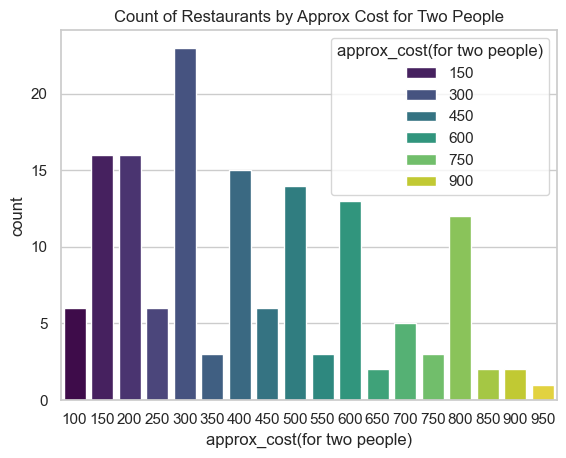

In [36]:
# Analysing the approx_cost(for two people) column to find the 
# preferred price range.
sns.countplot(data=df, x='approx_cost(for two people)', hue='approx_cost(for two people)', palette='viridis')
plt.title('Count of Restaurants by Approx Cost for Two People')
plt.show()

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300.

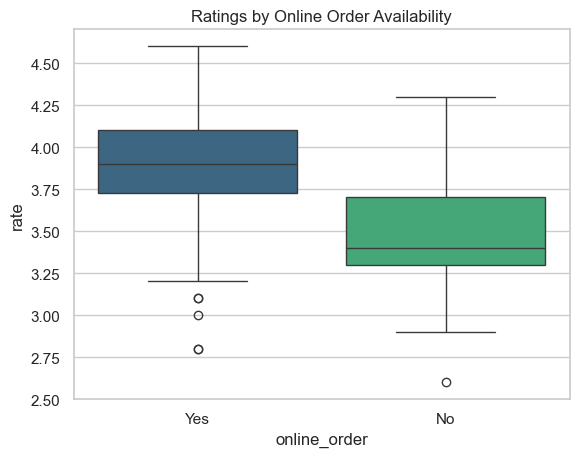

In [39]:
# Comparing ratings between restaurants that accept online orders and 
# those that don't.
sns.boxplot(data=df, x='online_order', y='rate', hue='online_order',palette='viridis')
plt.title('Ratings by Online Order Availability')
plt.show()

Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

<Axes: xlabel='listed_in(type)', ylabel='count'>

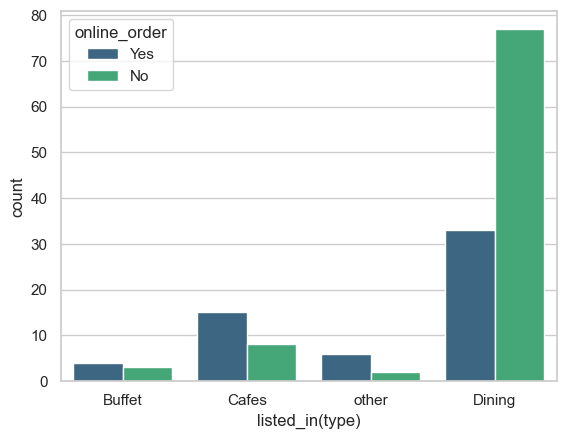

In [40]:
# Finding the relationship between order mode (online_order) and 
# restaurant type (listed_in(type)).
sns.countplot(data=df, x='listed_in(type)', hue='online_order', palette='viridis')

Conclusion: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.